<table width = "100%">
  <tr style="background-color:white;">
    <!-- QWorld Logo -->
    <td style="text-align:left;width:200px;"> 
        <a href="https://qworld.net/" target="_blank"><img src="../images/QWorld.png"> </a></td>
    <td style="text-align:right;vertical-align:bottom;font-size:16px;"> 
        Prepared by AkashNarayanan B</td>    
</table>
<hr>

# <font color="blue"> Solutions for </font> BQM for the Maximum Cut Problem

### Imports

In [2]:
from collections import defaultdict

import dimod
from dimod import BQM
import dwave_networkx as dnx
import matplotlib.pyplot as plt
import networkx as nx
from dimod.reference.samplers import ExactSolver

from bqm_utils import graph_viz, maxcut_viz

<a id="Task1"></a>
### Task 1

Find the maximum cut for the following graph using the built-in function and visualize the result.

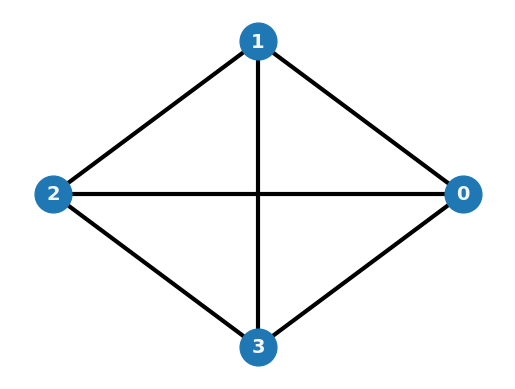

In [3]:
G1 = nx.turan_graph(4, 4)
graph_viz(G1)

### Solution

Define the sampler and pass the sampler and the problem graph `G1` as arguments to `maximum_cut()`.

In [4]:
sampler = ExactSolver()

cut = dnx.maximum_cut(G1, sampler)
print(cut)

{0, 1}


Visualize the result using the new function `maxcut_viz()` we defined in the notebook.

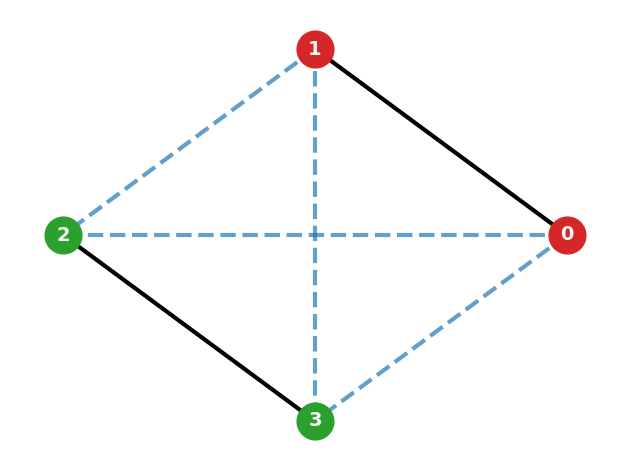

In [5]:
maxcut_viz(G1, cut)

<a id="Task2"></a>

### Task 2

Obtain the maximum cut for the following graph

1. Define the QUBO dictionary
2. Create an instance of BQM from the dictionary and solve it using the classical solver
3. Visualize the output obtained from the sampleset

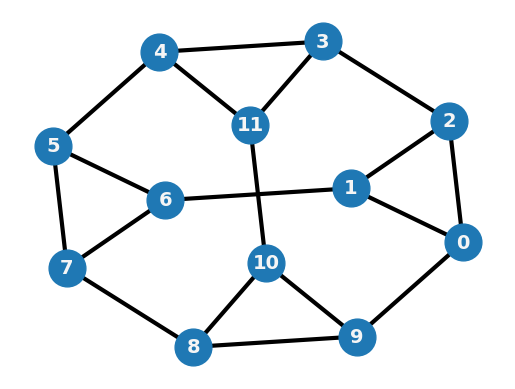

In [6]:
G2 = nx.truncated_tetrahedron_graph()
graph_viz(G2)

### Solution

1. Define the QUBO dictionary

In [7]:
d = defaultdict(int)

for i, j in G2.edges:
    d[(i, i)] += -1
    d[(j, j)] += -1
    d[(i, j)] += 2

print(d)

defaultdict(<class 'int'>, {(0, 0): -3, (1, 1): -3, (0, 1): 2, (2, 2): -3, (0, 2): 2, (9, 9): -3, (0, 9): 2, (1, 2): 2, (6, 6): -3, (1, 6): 2, (3, 3): -3, (2, 3): 2, (4, 4): -3, (3, 4): 2, (11, 11): -3, (3, 11): 2, (5, 5): -3, (4, 5): 2, (4, 11): 2, (5, 6): 2, (7, 7): -3, (5, 7): 2, (6, 7): 2, (8, 8): -3, (7, 8): 2, (8, 9): 2, (10, 10): -3, (8, 10): 2, (9, 10): 2, (10, 11): 2})


2. Create an instance of BQM from the dictionary and solve it using the classical solver

In [8]:
bqm = BQM.from_qubo(d)

sampler = ExactSolver()
sampleset = sampler.sample(bqm)

print(sampleset)

      0  1  2  3  4  5  6  7  8  9 10 11 energy num_oc.
716   0  1  0  1  0  1  0  1  0  1  0  1  -14.0       1
756   0  1  1  0  0  1  0  1  0  1  0  1  -14.0       1
872   0  0  1  0  1  0  1  1  0  1  0  1  -14.0       1
884   0  1  1  0  1  0  0  1  0  1  0  1  -14.0       1
1730  1  1  0  1  0  1  0  0  1  0  0  1  -14.0       1
1740  0  1  0  1  0  1  0  0  1  1  0  1  -14.0       1
1758  1  0  0  1  0  1  1  0  1  0  0  1  -14.0       1
1766  1  0  1  0  0  1  1  0  1  0  0  1  -14.0       1
1768  0  0  1  0  0  1  1  0  1  1  0  1  -14.0       1
1780  0  1  1  0  0  1  0  0  1  1  0  1  -14.0       1
1894  1  0  1  0  1  0  1  0  1  0  0  1  -14.0       1
1896  0  0  1  0  1  0  1  0  1  1  0  1  -14.0       1
2142  1  0  0  1  1  0  1  0  1  0  1  0  -14.0       1
2150  1  0  1  0  1  0  1  0  1  0  1  0  -14.0       1
2498  1  1  0  1  0  1  0  0  1  0  1  0  -14.0       1
2526  1  0  0  1  0  1  1  0  1  0  1  0  -14.0       1
3138  1  1  0  1  1  0  0  1  0  0  1  0  -14.0 

3. Visualize the output obtained from the sampleset

{0: 1, 1: 1, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 1, 8: 0, 9: 0, 10: 1, 11: 0}


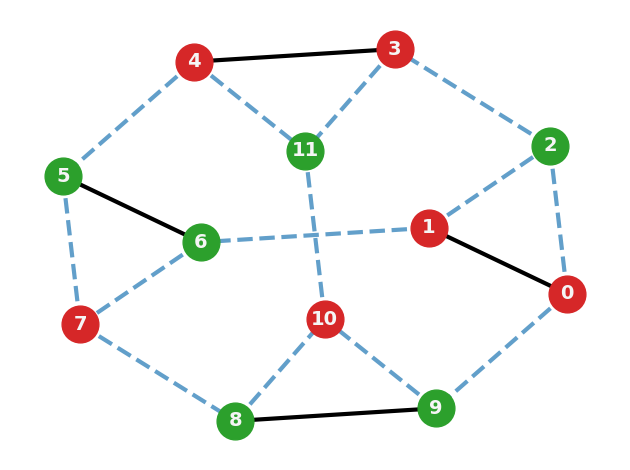

In [9]:
os = sampleset.first.sample
print(os)
maxcut_viz(G2, os)

<a id="Task3"></a>


### Task 3

Obtain the maximum cut for the following graph

1. Define the dictionaries `h` and `J`
2. Create an instance of BQM from the dictionaries and solve it using the classical solver
3. Visualize the output obtained from the sampleset

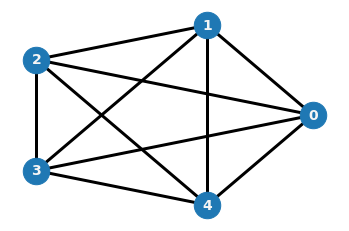

In [11]:
G3 = nx.complete_graph(5)

graph_viz(G3)

### Solution

1. Define the dictionaries `h` and `J`

In [12]:
h = defaultdict(int)
J = defaultdict(int)

for i, j in G3.edges:
    J[(i, j)] += 1

print(f"h = {h}")
print(f"J = {J}")

h = defaultdict(<class 'int'>, {})
J = defaultdict(<class 'int'>, {(0, 1): 1, (0, 2): 1, (0, 3): 1, (0, 4): 1, (1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 3): 1, (2, 4): 1, (3, 4): 1})


2. Create an instance of BQM from the dictionaries and solve it using the classical solver

In [14]:
bqm = BQM.from_ising(h, J)

sampler = ExactSolver()
sampleset = sampler.sample(bqm)

print(sampleset)

    0  1  2  3  4 energy num_oc.
2  +1 +1 -1 -1 -1   -2.0       1
4  -1 +1 +1 -1 -1   -2.0       1
5  +1 +1 +1 -1 -1   -2.0       1
6  +1 -1 +1 -1 -1   -2.0       1
8  -1 -1 +1 +1 -1   -2.0       1
9  +1 -1 +1 +1 -1   -2.0       1
11 -1 +1 +1 +1 -1   -2.0       1
12 -1 +1 -1 +1 -1   -2.0       1
13 +1 +1 -1 +1 -1   -2.0       1
14 +1 -1 -1 +1 -1   -2.0       1
16 -1 -1 -1 +1 +1   -2.0       1
17 +1 -1 -1 +1 +1   -2.0       1
19 -1 +1 -1 +1 +1   -2.0       1
23 -1 -1 +1 +1 +1   -2.0       1
24 -1 -1 +1 -1 +1   -2.0       1
25 +1 -1 +1 -1 +1   -2.0       1
27 -1 +1 +1 -1 +1   -2.0       1
28 -1 +1 -1 -1 +1   -2.0       1
29 +1 +1 -1 -1 +1   -2.0       1
30 +1 -1 -1 -1 +1   -2.0       1
1  +1 -1 -1 -1 -1    2.0       1
3  -1 +1 -1 -1 -1    2.0       1
7  -1 -1 +1 -1 -1    2.0       1
10 +1 +1 +1 +1 -1    2.0       1
15 -1 -1 -1 +1 -1    2.0       1
18 +1 +1 -1 +1 +1    2.0       1
20 -1 +1 +1 +1 +1    2.0       1
22 +1 -1 +1 +1 +1    2.0       1
26 +1 +1 +1 -1 +1    2.0       1
31 -1 -1 -

3. Visualize the output obtained from the sampleset

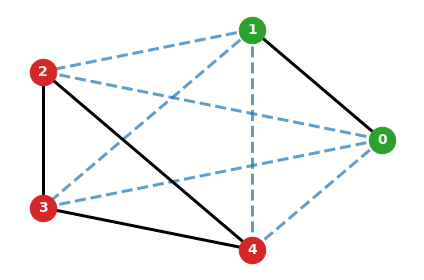

In [15]:
os = sampleset.first.sample

maxcut_viz(G3, os)